In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [9]:
# Read the data from the CSV file
data = pd.read_csv("Resources/crypto_market_data.csv")

# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
from sklearn.preprocessing import StandardScaler

numerical_data = data.select_dtypes(include=['number'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform the data
normalized_numerical_data = scaler.fit_transform(numerical_data)


# The 'normalized_data' variable now contains the normalized data


In [11]:
# Create a DataFrame with the scaled data
scaled_data_df = pd.DataFrame(normalized_numerical_data, columns=numerical_data.columns)


# Copy the crypto names from the original data
scaled_data_df['coinid'] = data['coin_id']

# Set the coinid column as index
scaled_data_df.set_index('coinid', inplace=True)


# Display sample data
print(scaled_data_df.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coinid                                                                  
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coinid                                                                   
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using the Original Data.

In [12]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [30]:
# Create an empty list to store the inertia values
inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
k = list(range(1, 12))
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)

# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(scaled_data_df)

# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

print(inertia_values)


c:\Users\amie-lynn.shank\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\amie-lynn.shank\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\amie-lynn.shank\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\amie-lynn.shank\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to 

[287.0, 195.82021818036043, 123.19048183836959, 79.02243535120975, 65.302379141625, 52.888518219775314, 43.91469044757747, 37.517032490103574, 32.485240832183536, 28.22289929060893, 24.545512769147678]


In [31]:
# Create a dictionary with the data to plot the Elbow curve
k_values = list(range(1, 12))  # k-values from 1 to 11

elbow_data = {
    'k_values': list(range(1, 12)),  # k-values from 1 to 11
    'inertia_values': inertia_values  # Inertia values you calculated
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)


    k_values  inertia_values
0          1      287.000000
1          2      195.820218
2          3      123.190482
3          4       79.022435
4          5       65.302379
5          6       52.888518
6          7       43.914690
7          8       37.517032
8          9       32.485241
9         10       28.222899
10        11       24.545513


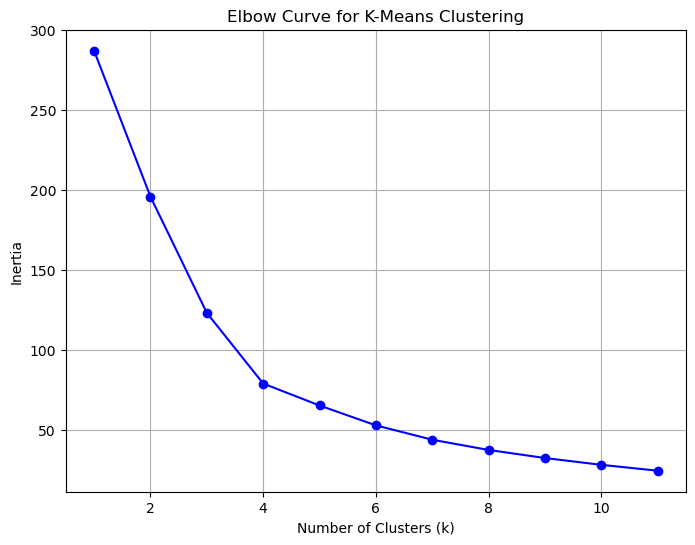

In [33]:
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
k_values = elbow_data['k_values']
inertia_values = elbow_data['inertia_values']

# Plotting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title("Elbow Curve for K-Means Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 
The optimal value for k in K-Means clustering is typically determined by examining the "Elbow" point in the plot of the Elbow curve. This point represents the value of k at which the rate of decrease in the inertia (within-cluster sum of squares) sharply changes.  Herego, I believe that 
6 is hte best balue for 'k'.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [34]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans

# Replace 'best_k' with the optimal value for k
best_k = 3  # Example value, replace with the actual best k

# Initialize the K-Means model with the best value for k
kmeans = KMeans(n_clusters=best_k, random_state=0)

# Fit the model to your scaled data
kmeans.fit(scaled_data_df)  # Assuming 'scaled_data_df' is your scaled data


c:\Users\amie-lynn.shank\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\amie-lynn.shank\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [35]:
# Fit the K-Means model using the scaled data
from sklearn.cluster import KMeans

# Initialize the K-Means model with the desired number of clusters (best_k)
kmeans = KMeans(n_clusters=best_k, random_state=0)

# Fit the K-Means model to your scaled data
kmeans.fit(scaled_data_df)  # Assuming 'scaled_data_df' is your scaled data


c:\Users\amie-lynn.shank\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\amie-lynn.shank\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [36]:
# Predict the clusters to group the cryptocurrencies using the scaled data
# Predict the clusters for the scaled data
cluster_labels = kmeans.predict(scaled_data_df)

# Add the cluster labels to your DataFrame
scaled_data_df['Cluster'] = cluster_labels


# Print the resulting array of cluster values.
print(cluster_labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0]


In [37]:
# Create a copy of the DataFrame
# Create a copy of the DataFrame
copied_df = scaled_data_df.copy()


In [38]:
# Add a new column to the DataFrame with the predicted clusters
scaled_data_df['Predicted_Cluster'] = cluster_labels

# Display sample data
print(scaled_data_df.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coinid                                                                  
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coinid                                                                   
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [39]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
import hvplot.pandas  # Import the hvPlot library

# Assuming 'scaled_data_df' is your DataFrame with the predicted clusters, and 'hover_cols' is the list of columns to display on hover
scatter_plot = scaled_data_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Predicted_Cluster",  # Color the points by the predicted clusters
    cmap="Category20",  # Choose a color map for the clusters
    hover_cols=['coinid'],  # Add the cryptocurrency name for hover information
    title="Cryptocurrency Scatter Plot"
)

# Display the scatter plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Predicted_Cluster,coinid)

---

### Optimize Clusters with Principal Component Analysis.

In [40]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA

# Create a PCA model instance with n_components=3
pca = PCA(n_components=3)


In [41]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

# View the first five rows of the DataFrame. 
# Apply PCA to reduce data to three principal components
pca_components = pca.fit_transform(scaled_data_df)

# Create a new DataFrame with the reduced components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])

# Display the first five rows of the PCA DataFrame
print(pca_df.head())

        PC1       PC2       PC3
0 -0.380925 -0.965082  0.463782
1 -0.349391 -0.555541  0.952984
2 -0.466854  0.047168 -0.646682
3 -0.516921  0.088937 -0.486056
4 -0.614436 -2.263477  1.863453


In [42]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

# Print the explained variance for each principal component
for i, var in enumerate(explained_variance, 1):
    print(f"Explained Variance for PC{i}: {var:.4f}")


Explained Variance for PC1: 0.3832
Explained Variance for PC2: 0.3391
Explained Variance for PC3: 0.1707


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Per the code above, the answer is 0.8930

In [63]:
# Create a new DataFrame with the PCA data.
# Create a new DataFrame for PCA data
pca_data_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])

# Copy the cryptocurrency names from the original data
pca_data_df['coinid'] = scaled_data_df.index

# Set the 'coinid' column as the index
pca_data_df.set_index('coinid', inplace=True)

# Display sample data
print(pca_data_df.head())



                   PC1       PC2       PC3
coinid                                    
bitcoin      -0.380925 -0.965082  0.463782
ethereum     -0.349391 -0.555541  0.952984
tether       -0.466854  0.047168 -0.646682
ripple       -0.516921  0.088937 -0.486056
bitcoin-cash -0.614436 -2.263477  1.863453


---

### Find the Best Value for k Using the PCA Data

In [64]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = list(range(1, 12))


In [65]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
# Create an empty list to store the inertia values
inertia_values_pca = []

# Assuming 'pca_data_df' is your DataFrame with the PCA data
for k in k_values_pca:
    # Create a KMeans model with the current value of k
    kmeans_pca = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the PCA data
    kmeans_pca.fit(pca_data_df)
    
    # Append the model's inertia (within-cluster sum of squares) to the inertia list
    inertia_values_pca.append(kmeans_pca.inertia_)

c:\Users\amie-lynn.shank\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\amie-lynn.shank\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\amie-lynn.shank\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\amie-lynn.shank\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to 

In [66]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve
# Create a dictionary with the data for the Elbow curve
elbow_data_pca = {
    'k_values': k_values_pca,  # List of k-values
    'inertia_values': inertia_values_pca  # Inertia values calculated with PCA data
}

# Create a DataFrame with the data for the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
print(elbow_df_pca.head())

   k_values  inertia_values
0         1      264.828553
1         2      174.995405
2         3       92.399455
3         4       48.304689
4         5       37.912696


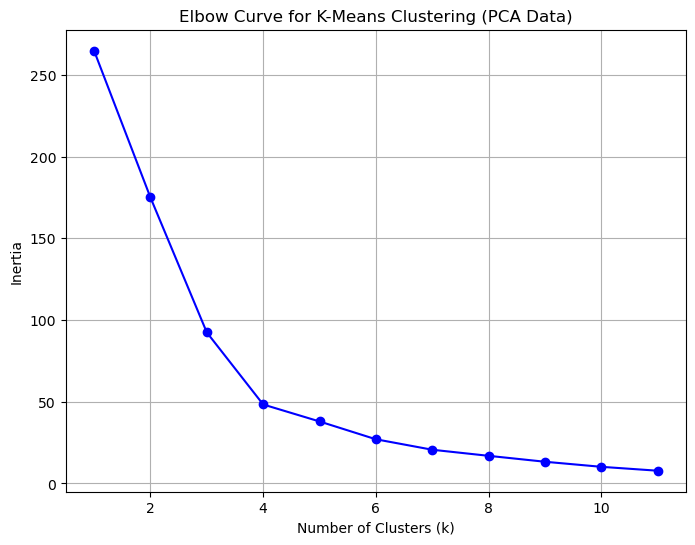

In [67]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(elbow_df_pca['k_values'], elbow_df_pca['inertia_values'], marker='o', linestyle='-', color='b')
plt.title("Elbow Curve for K-Means Clustering (PCA Data)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**  When using PCA, the inertia starts to level off at 4

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**   It increased by 2 points, from 6 to 4

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [73]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans


# Initialize the K-Means model with the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=0)


In [74]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_data_df)


c:\Users\amie-lynn.shank\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\amie-lynn.shank\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [75]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels_pca = kmeans_pca.predict(pca_data_df)

# Print the resulting array of cluster values.
print(cluster_labels_pca)


[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [78]:
# Create a copy of the DataFrame with the PCA data
pca_data_df_copy = pca_data_df.copy()


# Add a new column to the DataFrame with the predicted clusters
pca_data_df['Predicted_Cluster'] = cluster_labels_pca


# Display sample data
print(pca_data_df.head())


                   PC1       PC2       PC3  Predicted_Cluster
coinid                                                       
bitcoin      -0.380925 -0.965082  0.463782                  0
ethereum     -0.349391 -0.555541  0.952984                  0
tether       -0.466854  0.047168 -0.646682                  3
ripple       -0.516921  0.088937 -0.486056                  3
bitcoin-cash -0.614436 -2.263477  1.863453                  0


In [79]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = pca_data_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="Predicted_Cluster",  # Color the points by the predicted clusters
    cmap="Category20",  # Choose a color map for the clusters
    hover_cols=['coinid'],  # Add the cryptocurrency name for hover information
    title="Scatter Plot of Cryptocurrencies (PCA Data)"
)

# Display the scatter plot
scatter_plot

:Scatter   [PC1]   (PC2,Predicted_Cluster,coinid)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

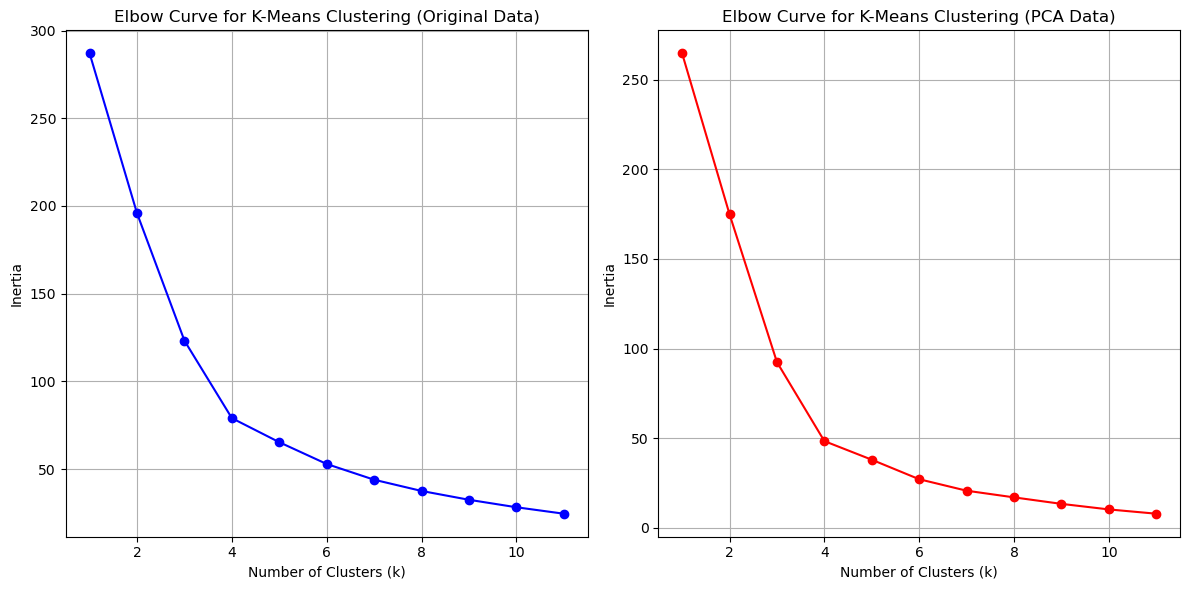

In [80]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(12, 6))

# Plot the Elbow curve for the original data
plt.subplot(1, 2, 1)
plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], marker='o', linestyle='-', color='b')
plt.title("Elbow Curve for K-Means Clustering (Original Data)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)

# Plot the Elbow curve for PCA-transformed data
plt.subplot(1, 2, 2)
plt.plot(elbow_df_pca['k_values'], elbow_df_pca['inertia_values'], marker='o', linestyle='-', color='r')
plt.title("Elbow Curve for K-Means Clustering (PCA Data)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)

plt.tight_layout()
plt.show()

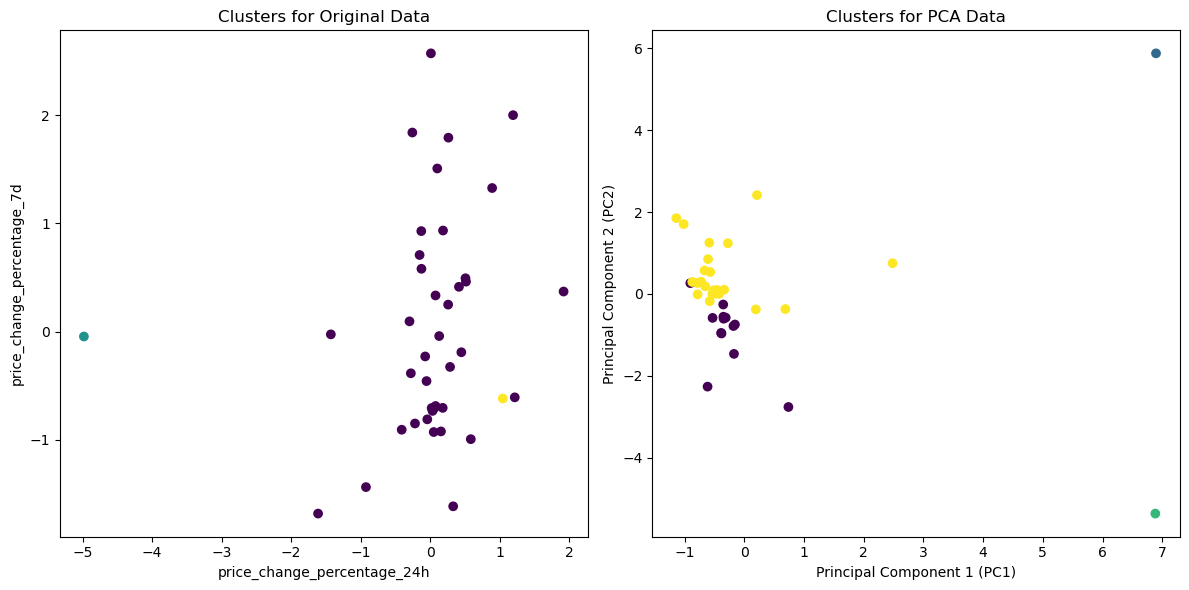

In [88]:
# Composite plot to contrast the clusters
plt.figure(figsize=(12, 6))

# Scatter plot for the original data
plt.subplot(1, 2, 1)
plt.scatter(scaled_data_df['price_change_percentage_24h'], scaled_data_df['price_change_percentage_7d'], c=cluster_labels, cmap='viridis')
plt.title("Clusters for Original Data")
plt.xlabel("price_change_percentage_24h")
plt.ylabel("price_change_percentage_7d")

# Scatter plot for PCA-transformed data
plt.subplot(1, 2, 2)
plt.scatter(pca_data_df['PC1'], pca_data_df['PC2'], c=cluster_labels_pca, cmap='viridis')
plt.title("Clusters for PCA Data")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")

plt.tight_layout()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**  The impact of using fewer features to cluster data using K-Means involves a trade-off between dimensionality reduction and information loss. 